```
From: https://github.com/ksatola
Version: 0.1.1

TODOs
1. https://towardsdatascience.com/categorical-encoding-using-label-encoding-and-one-hot-encoder-911ef77fb5bd

```

# Data Transforms - Preprocess Data

## Table of Contents
- [Importance of Data Scaling](#imp)
- [How to Scale Target Variables](#how)
    - Manual Transform of the Target Variable
    - Automatic Transform of the Target Variable
- [Standardization](#sta)
- [Normalization (Scale to Range)](#nor)
- [Dummy Variables (One-hot Encoding)](#dum)
- [Label Encoder](#lab)
- [Frequency Encoding](#fre)
- [Pulling Categories from Strings](#pul)
- [Manual Feature Engineering](#man)
- [Target Variables for Regression Transformation](#reg)
- [Transform Data to Better Fit The Normal Distribution](#gauss)
    - Sample Size
    - Data Resolution
    - Extreme Values
    - Long Tails
    - Power Transforms

In [2]:
# Connect with underlying Python code
%load_ext autoreload
%autoreload 2
import sys
sys.path.insert(0, '../src')

In [3]:
from datasets import (
    get_dataset,
    add_dataset
)

In [4]:
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
df = pd.DataFrame(
    {
        "a": range(5),
        "b": [-100, -50, 0, 200, 1000],
    }
)
df.head()

,a,b
0,0,-100
1,1,-50
2,2,0
3,3,200
4,4,1000


---
<a id='imp'></a>

## Importance of Data Scaling
It is common to have data where the scale of values differs from variable to variable. For example, one variable may be in feet, another in meters, and so on.

Some `machine learning algorithms perform much better if all of the variables are scaled to the same range`, such as scaling all variables to values between 0 and 1, called **normalization**.

This effects algorithms that use a weighted sum of the input, like `linear models` and `neural networks`, as well as models that use distance measures such as `support vector machines` and `k-nearest neighbors`.

As such, `it is a good practice to scale input data`, and perhaps even try other data transforms such as making the data more normal (better fit a Gaussian probability distribution) using a power transform. `This also applies to output variables`, called target variables, such as numerical values that are predicted when modeling regression predictive modeling problems.

For **regression problems**, it is often desirable to scale or transform both the input and the target variables.

Scaling input variables is straightforward. In scikit-learn, you can use the scale objects manually, or the more convenient Pipeline that allows you to chain a series of data transform objects together before using your model. The [Pipeline](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) will fit the scale objects on the training data for you and apply the transform to new data, such as when using a model to make a prediction.

---
<a id='how'></a>

## How to Scale Target Variables
There are two ways that you can scale target variables. The first is to manually manage the transform, and the second is to use a new automatic way for managing the transform.
1. Manually transform the target variable.
2. Automatically transform the target variable.

### Manual Transform of the Target Variable
Manually managing the scaling of the target variable involves creating and applying the scaling object to the data manually. It involves the following steps:
1. Create the transform object, e.g. a MinMaxScaler.
2. Fit the transform on the training dataset.
3. Apply the transform to the train and test datasets.
4. Invert the transform on any predictions made.

This is a pain, as it means you cannot use convenience functions in scikit-learn, such as cross_val_score(), to quickly evaluate a model.

### Automatic Transform of the Target Variable
An alternate approach is to `automatically manage the transform and inverse transform`.

This can be achieved by using the [TransformedTargetRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.compose.TransformedTargetRegressor.html) object that wraps a given model and a scaling object. It will prepare the transform of the target variable using the same training data used to fit the model, then apply that inverse transform on any new data provided when calling predict(), returning predictions in the correct scale.

This is much easier and allows you to use helpful functions like cross_val_score() to evaluate a model.

---
<a id='sta'></a>

## Standardization
`Standardization` means standardizing the features around the center and 0 with a standard deviation of 1 is important when we compare measurements that have different units. Variables that are measured at different scales do not contribute equally to the analysis and might end up creating a bias.

Some algorithms, such as `SVM`, perform better when the data is standardized. Each column should have a mean value of 0 and standard deviation of 1. Sklearn provides a `.fit_transform` method that combines both `.fit` and `.transform`.

Here is a pandas version. Remember that you will need to track the original mean and standard deviation if you use this for preprocessing. Any sample that you will use to predict later will need to be standardized with those same values

In [10]:
from sklearn import preprocessing

std = preprocessing.StandardScaler()
scaled = std.fit_transform(df)
scaled

array([[-1.41421356, -0.75995002],
       [-0.70710678, -0.63737744],
       [ 0.        , -0.51480485],
       [ 0.70710678, -0.02451452],
       [ 1.41421356,  1.93664683]])

In [11]:
std.scale_

array([  1.41421356, 407.92156109])

In [12]:
std.mean_

array([  2., 210.])

In [13]:
std.var_

array([2.000e+00, 1.664e+05])

In [14]:
# Return to Pandas DataFrame
std_df = pd.DataFrame(scaled, index=df.index, columns=df.columns)
std_df.head()

,a,b
0,-1.414214,-0.759950
1,-0.707107,-0.637377
2,0.000000,-0.514805
3,0.707107,-0.024515
4,1.414214,1.936647


In [15]:
# Pandas version
std2 = (df - df.mean()) / df.std()
std2

,a,b
0,-1.264911,-0.679720
1,-0.632456,-0.570088
2,0.000000,-0.460455
3,0.632456,-0.021926
4,1.264911,1.732190


In [18]:
std2.mean()

a    4.440892e-17
b    0.000000e+00
dtype: float64

In [19]:
std2.std()

a    1.0
b    1.0
dtype: float64

---
<a id='nor'></a>

## Normalization (Scale to Range)
Scaling to range is translating data so it is between 0 and 1, inclusive. Having the data bounded may be useful. However, if you have `outliers`, you probably want to be careful using this.

In [12]:
from sklearn import preprocessing

mms = preprocessing.MinMaxScaler()
mms.fit(df)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [13]:
mms.transform(df)

array([[0.        , 0.        ],
       [0.25      , 0.04545455],
       [0.5       , 0.09090909],
       [0.75      , 0.27272727],
       [1.        , 1.        ]])

In [ ]:
mms = preprocessing.MinMaxScaler()
scaled_features = mms.fit_transform(df.values)

df2 = pd.DataFrame(data=scaled_features, index=df.index, columns=df.columns)
df2.head()

In [14]:
# Pandas version
norm = (df - df.min()) / (df.max() - df.min())
norm

,a,b
0,0.00,0.000000
1,0.25,0.045455
2,0.50,0.090909
3,0.75,0.272727
4,1.00,1.000000


---
<a id='dum'></a>

## Dummy Variables (One-hot Encoding)
We can use pandas to create dummy variables from categorical data. This is also referred to as one-hot encoding, or indicator encoding. Dummy variables are especially useful if the data is nominal (unordered). The `get_dummies` function in pandas creates multiple columns for a categorical column, each with a 1 or 0 if the original column had that value. The `drop_first` option can be used to eliminate a column (one of the dummy columns is a linear combination of the other columns).

In [15]:
df_cat = pd.DataFrame(
    {
        "name": ["George", "Paul"],
        "inst": ["Bass", "Guitar"],
    }
)
df_cat.head()

,name,inst
0,George,Bass
1,Paul,Guitar


In [16]:
pd.get_dummies(df_cat)

,name_George,name_Paul,inst_Bass,inst_Guitar
0,1,0,1,0
1,0,1,0,1


In [17]:
pd.get_dummies(df_cat, drop_first=True)

,name_Paul,inst_Guitar
0,0,0
1,1,1


In [18]:
df_cat2 = pd.DataFrame(
    {
        "A": [1, None, 3],
        "names": [
            "Fred,George",
            "George",
            "John,Paul",
        ],
    }
)
df_cat2.head()

,A,names
0,1.0,"Fred,George"
1,NaN,George
2,3.0,"John,Paul"


In [19]:
pd.get_dummies(df_cat2)

,A,"names_Fred,George",names_George,"names_John,Paul"
0,1.0,1,0,0
1,NaN,0,1,0
2,3.0,0,0,1


In [20]:
pd.get_dummies(df_cat2, drop_first=True)

,A,names_George,"names_John,Paul"
0,1.0,0,0
1,NaN,1,0
2,3.0,0,1


---
<a id='lab'></a>

## Label Encoder
If we have high cardinality nominal data, we can use label encoding. This will take categorical data and assign each value a number. It is useful for high cardinality data. This encoder imposes ordinality, which may or may not be desired. It can take up less space than one-hot encoding, and some (tree) algorithms can deal with this encoding. The label encoder can only deal with one column at a time.

In [21]:
from sklearn import preprocessing

lab = preprocessing.LabelEncoder()
lab.fit_transform(df_cat.name)

array([0, 1])

If you have encoded values, applying the `.inverse_transform` method decodes them.

In [22]:
lab.inverse_transform([1, 1, 0])

array(['Paul', 'Paul', 'George'], dtype=object)

You can also use pandas to label encode. First, you convert the column to a categorical column type, and then pull out the numeric code from it. This code will create a new series of numeric data from a pandas series. We use the `.as_ordered` method to ensure that the category is ordered.

In [23]:
df_cat.name.astype("category").cat.as_ordered().cat.codes + 1

0    1
1    2
dtype: int8

---
<a id='fre'></a>

## Frequency Encoding
Another option for handling high cardinality categorical data is to frequency encode it. This means replacing the name of the category with the count it had in the training data. We will use pandas to do this. First, we will use the pandas `.value_counts` method to make a mapping (a pandas series that maps strings to counts). With the mapping we can use the `.map` method to do the encoding. Make sure you store the training mapping so you can encode future data with the same data.

In [24]:
df_cat3 = pd.DataFrame(
    {
        "name": ["George", "Paul", "George"],
        "inst": ["Bass", "Guitar", "Bass"],
    }
)
df_cat3.head()

,name,inst
0,George,Bass
1,Paul,Guitar
2,George,Bass


In [25]:
mapping = df_cat3.name.value_counts()
mapping

George    2
Paul      1
Name: name, dtype: int64

In [26]:
df_cat3.name.map(mapping)

0    2
1    1
2    2
Name: name, dtype: int64

---
<a id='pul'></a>

## Pulling Categories from Strings
One way to increase the accuracy of the Titanic model is to pull out titles from the names. A quick hack to find the most common triples is to use the `Counter` class. Another option is to use a `regular expression` to pull out the capital letter followed by lowercase letters and a period.

In [27]:
df = get_dataset('titanic3')

In [28]:
from collections import Counter

c = Counter()
def triples(val):
    for i in range(len(val)):
        c[val[i : i + 3]] += 1

df.name.apply(triples)
c.most_common(10)

[(', M', 1282),
 (' Mr', 954),
 ('r. ', 830),
 ('Mr.', 757),
 ('s. ', 460),
 ('n, ', 320),
 (' Mi', 283),
 ('iss', 261),
 ('ss.', 261),
 ('Mis', 260)]

In [29]:
df.name.str.extract("([A-Za-z]+)\.", expand=False).head()

0      Miss
1    Master
2      Miss
3        Mr
4       Mrs
Name: name, dtype: object

In [30]:
# We can use .value_counts to see the frequency of these
df.name.str.extract("([A-Za-z]+)\.", expand=False).value_counts()

Mr          757
Miss        260
Mrs         197
Master       61
Rev           8
Dr            8
Col           4
Mlle          2
Major         2
Ms            2
Lady          1
Don           1
Jonkheer      1
Dona          1
Countess      1
Mme           1
Sir           1
Capt          1
Name: name, dtype: int64

---
<a id='man'></a>

## Manual Feature Engineering
We can use pandas to generate new features. For the Titanic dataset, we can add aggregate cabin data (maximum age per cabin, mean age per cabin, etc.). To get aggregate data per cabin and merge it back in, use the pandas `.groupby` method to create the data. Then align it back to the original data using the `.merge` method.

In [31]:
agg = (
    df.groupby("cabin")
    .agg("min,max,mean,sum".split(","))
    .reset_index()
)

agg.columns = [
    "_".join(c).strip("_")
    for c in agg.columns.values
]

agg_df = df.merge(agg, on="cabin")

In [32]:
agg_df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,...,parch_mean,parch_sum,fare_min,fare_max,fare_mean,fare_sum,body_min,body_max,body_mean,body_sum
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,...,0.5,1,211.3375,211.3375,211.3375,422.675,NaN,NaN,NaN,0.0
1,1,1,"Madill, Miss. Georgette Alexandra",female,15.0000,0,1,24160,211.3375,B5,...,0.5,1,211.3375,211.3375,211.3375,422.675,NaN,NaN,NaN,0.0
2,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,...,2.0,8,151.5500,151.5500,151.5500,606.200,135.0,135.0,135.0,135.0
3,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,...,2.0,8,151.5500,151.5500,151.5500,606.200,135.0,135.0,135.0,135.0
4,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,...,2.0,8,151.5500,151.5500,151.5500,606.200,135.0,135.0,135.0,135.0


In [55]:
add_dataset(data=agg_df, name="titanic3_aggregated", url="../data/", type="csv", origin="Dataset created from titanic3")

---
<a id='reg'></a>

## Target Variables for Regression Transformation
Data preparation is a big part of applied machine learning. Correctly preparing your training data can mean the difference between mediocre and extraordinary results, even with very simple linear algorithms. Performing data preparation operations, such as scaling, is relatively straightforward for input variables and has been made routine in Python via the Pipeline scikit-learn class.

On regression predictive modeling problems where a numerical value must be predicted, it can also be critical to scale and perform other data transformations on the target variable. This can be achieved in Python using the [TransformedTargetRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.compose.TransformedTargetRegressor.html) class.

In [10]:
# target = 'medv'
target_name = 'medv'
df = get_dataset('boston_housing')
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


We will fit a HuberRegressor object and normalize the input variables using a Pipeline.

In [11]:
# Split into inputs and outputs
y = df[[target_name]]
X = df.drop(columns=[target_name])

In [12]:
# Example of normalizing input and output variables for regression.
from numpy import mean
from numpy import absolute
from numpy import loadtxt
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.linear_model import HuberRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import TransformedTargetRegressor

# Prepare the model with input scaling
pipeline = Pipeline(steps=[
    ('normalize', MinMaxScaler()), 
    ('model', HuberRegressor()),
])

# Prepare the model with target scaling
model = TransformedTargetRegressor(regressor=pipeline, transformer=MinMaxScaler())

# Evaluate model
cv = KFold(n_splits=10, shuffle=True, random_state=1)
scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)

# Convert scores to positive
scores = absolute(scores)

# Summarize the result
s_mean = mean(scores)
print('Mean MAE: %.3f' % (s_mean))

Mean MAE: 3.191


We are not restricted to using scaling objects; for example, we can also explore using other data transforms on the target variable, such as the [PowerTransformer](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PowerTransformer.html), that can make each variable more-Gaussian-like (using the Yeo-Johnson transform) and improve the performance of linear models. By default, the PowerTransformer also performs a standardization of each variable after performing the transform.

In [13]:
# Example of power transform input and output variables for regression.
from numpy import mean
from numpy import absolute
from numpy import loadtxt
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.linear_model import HuberRegressor
from sklearn.preprocessing import PowerTransformer
from sklearn.compose import TransformedTargetRegressor

# Prepare the model with input scaling
pipeline = Pipeline(steps=[
    ('power', PowerTransformer()), 
    ('model', HuberRegressor()),
])

# Prepare the model with target scaling
model = TransformedTargetRegressor(regressor=pipeline, transformer=PowerTransformer())

# Evaluate model
cv = KFold(n_splits=10, shuffle=True, random_state=1)
scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)

# Convert scores to positive
scores = absolute(scores)

# Summarize the result
s_mean = mean(scores)
print('Mean MAE: %.3f' % (s_mean))

Mean MAE: 2.926


In [ ]:
We see further improvement to a MAE of about 2.9

---
<a id='gauss'></a>

## Transform Data to Better Fit The Normal Distribution
A large portion of the field of statistics is concerned with methods that assume a Gaussian distribution: the familiar bell curve.

If your data has a Gaussian distribution, the parametric methods are powerful and well understood. This gives some incentive to use them if possible. Even if your data does not have a Gaussian distribution.

It is possible that your data does not look Gaussian or fails a normality test, but can be transformed to make it fit a Gaussian distribution. This is more likely if you are familiar with the process that generated the observations and you believe it to be a Gaussian process, or the distribution looks almost Gaussian, except for some distortion.

There may be occasions when you are working with a non-Gaussian distribution, but wish to use parametric statistical methods instead of nonparametric methods.

For example, you may have a data sample that has the familiar bell-shape, meaning that it looks Gaussian, but it fails one or more statistical normality tests. This suggests that the data may be Gaussian-like. You would prefer to use parametric statistics in this situation given that better statistical power and because the data is clearly Gaussian, or could be, after the right data transform. There is no silver bullet for this process; some experimentation and judgment may be required.

`Parametric statistics` are based on assumptions about the distribution of population from which the sample was taken. `Nonparametric statistic`s are not based on assumptions, that is, the data can be collected from a sample that does not follow a specific distribution.

### Sample Size
One common reason that a data sample is non-Gaussian is because the `size of the data sample is too small`.

Many statistical methods were developed where data was scarce. Hence, the minimum. number of samples for many methods may be as low as 20 or 30 observations.

Nevertheless, given the noise in your data, you may not see the familiar bell-shape or fail normality tests with a modest number of samples, such as 50 or 100. If this is the case, perhaps you can collect more data. `Thanks to `**the law of large numbers**`, the more data that you collect, the more likely your data will be able to used to describe the underlying population distribution`.

To make this concrete, below is an example of a plot of a small sample of 50 observations drawn from a Gaussian distribution with a mean of 100 and a standard deviation of 50.

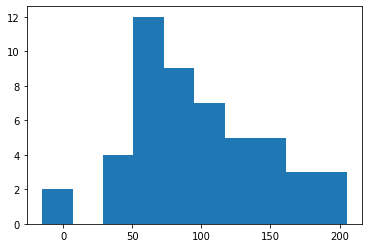

In [14]:
# Histogram plot of a small sample
from numpy.random import seed
from numpy.random import randn

# Seed the random number generator
seed(1)

# Generate a univariate data sample
data = 50 * randn(50) + 100

# Histogram
plt.hist(data)
plt.show()

Increasing the size of the sample from 50 to 200 can help to better expose the Gaussian shape of the data distribution.

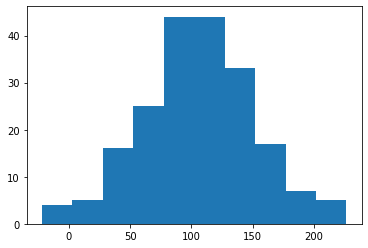

In [16]:
# Seed the random number generator
seed(1)

# Generate a univariate data sample
data = 50 * randn(200) + 100

# Histogram
plt.hist(data)
plt.show()

### Data Resolution
Perhaps you expect a Gaussian distribution from the data, but no matter the size of the sample that you collect, it does not materialize.

A common reason for this is the resolution that you are using to collect the observations. The distribution of the data may be obscured by the chosen resolution of the data or the fidelity of the observations. There may be many reasons why the resolution of the data is being modified prior to modeling, such as:

- The configuration of the mechanism making the observation.
- The data is passing through a quality-control process.
- The resolution of the database used to store the data.

To make this concrete, we can make a sample of 100 random Gaussian numbers with a mean of 0 and a standard deviation of 1 and remove all of the decimal places.

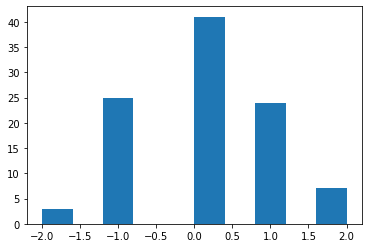

In [20]:
# Histogram plot of a low res sample
from numpy.random import seed
from numpy.random import randn

# Seed the random number generator
seed(1)

# Generate a univariate data sample
data = randn(100)

# Remove decimal component
data = data.round(0)

# Histogram
plt.hist(data)
plt.show()

Running the example results in a distribution that appears discrete although Gaussian-like. Adding the resolution back to the observations would result in a fuller distribution of the data.

### Extreme Values
A data sample may have a Gaussian distribution, but may be distorted for a number of reasons.

A common reason is the presence of extreme values at the edge of the distribution. Extreme values could be present for a number of reasons, such as:
- Measurement error.
- Missing data.
- Data corruption.
- Rare events.
In such cases, the extreme values could be identified and removed in order to make the distribution more Gaussian. These extreme values are often called `outliers`.

This may require domain expertise or consultation with a domain expert in order to both design the criteria for identifying outliers and then removing them from the data sample and all data samples that you or your model expect to work with in the future.

We can demonstrate how easy it is to have extreme values disrupt the distribution of data.

The example below creates a data sample with 100 random Gaussian numbers scaled to have a mean of 10 and a standard deviation of 5. An additional 10 zero-valued observations are then added to the distribution. This can happen if missing or corrupt values are assigned the value of zero. This is a common behavior in publicly available machine learning datasets; for example.

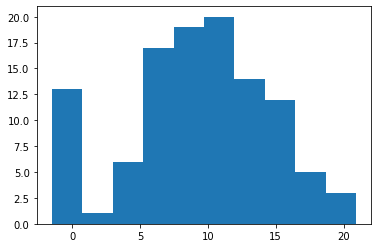

In [21]:
# Histogram plot of data with outliers
from numpy.random import seed
from numpy.random import randn
from numpy import zeros
from numpy import append

# Seed the random number generator
seed(1)

# Generate a univariate data sample
data = 5 * randn(100) + 10

# Add extreme values
data = append(data, zeros(10))

# Histogram
plt.hist(data)
plt.show()

### Long Tails
Extreme values can manifest in many ways. In addition to an abundance of rare events at the edge of the distribution, you may see a long tail on the distribution in one or both directions.

In plots, this can make the distribution look like it is exponential, when in fact it might be Gaussian with an abundance of rare events in one direction.

You could use simple threshold values, perhaps based on the number of standard deviations from the mean, to identify and remove long tail values.

We can demonstrate this with a contrived example. The data sample contains 100 Gaussian random numbers with a mean of 10 and a standard deviation of 5. An additional 50 uniformly random values in the range 10-to-110 are added. This creates a long tail on the distribution.

Running the example you can see how the long tail distorts the Gaussian distribution and makes it look almost exponential or perhaps even bimodal (two bumps).

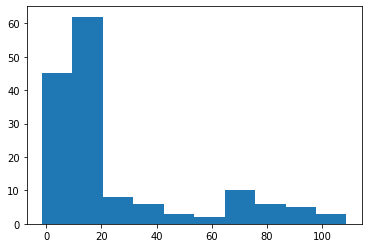

In [22]:
# Histogram plot of data with a long tail
from numpy.random import seed
from numpy.random import randn
from numpy.random import rand
from numpy import append

# Seed the random number generator
seed(1)

# Generate a univariate data sample
data = 5 * randn(100) + 10
tail = 10 + (rand(50) * 100)

# Add long tail
data = append(data, tail)

# Histogram
plt.hist(data)
plt.show()

We can use a simple threshold, such as a value of 25, on this dataset as a cutoff and remove all observations higher than this threshold. We did choose this threshold with prior knowledge of how the data sample was contrived, but you can imagine testing different thresholds on your own dataset and evaluating their effect.

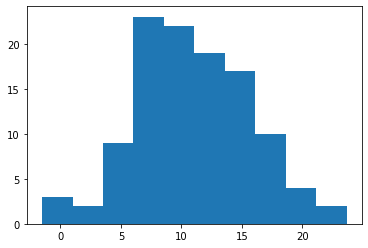

In [23]:
# Histogram plot of data with a long tail
from numpy.random import seed
from numpy.random import randn
from numpy.random import rand
from numpy import append

# Seed the random number generator
seed(1)

# Generate a univariate data sample
data = 5 * randn(100) + 10
tail = 10 + (rand(50) * 100)

# Add long tail
data = append(data, tail)

# Trim values
data = [x for x in data if x < 25]

# Histogram
plt.hist(data)
plt.show()

### Power Transforms
The distribution of the data may be normal, but the data may require a transform in order to help expose it.

For example, the data may have a skew, meaning that the bell in the bell shape may be pushed one way or another. In some cases, this can be corrected by transforming the data via calculating the square root of the observations.

Alternately, the distribution may be exponential, but may look normal if the observations are transformed by taking the natural logarithm of the values. Data with this distribution is called `log-normal`.

To make this concrete, below is an example of a sample of Gaussian numbers transformed to have an exponential distribution.

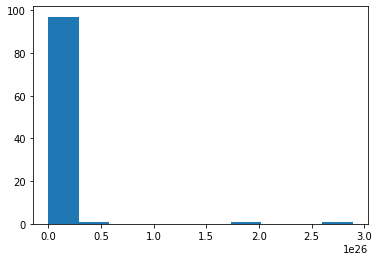

In [24]:
# log-normal distribution
from numpy.random import seed
from numpy.random import randn
from numpy import exp

# Seed the random number generator
seed(1)

# Generate a univariate data sample
data = 5 * randn(100) + 50

# Transform to be exponential
data = exp(data)

# Histogram
plt.hist(data)
plt.show()

Taking the square root and the logarithm of the observation in order to make the distribution normal belongs to a class of transforms called power transforms. The **Box-Cox method** is a data transform method that is able to perform a range of power transforms, including the log and the square root. The method is named for George Box and David Cox.

More than that, it can be configured to evaluate a suite of transforms automatically and select a best fit. It can be thought of as a power tool to iron out power-based change in your data sample. The resulting data sample may be more linear and will better represent the underlying non-power distribution, including Gaussian.

The [boxcox()](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.boxcox.html) SciPy function implements the **Box-Cox method**. It takes an argument, called `lambda`, that controls the type of transform to perform.

Below are some common values for lambda:

- lambda = -1. is a reciprocal transform.
- lambda = -0.5 is a reciprocal square root transform.
- lambda = 0.0 is a log transform.
- lambda = 0.5 is a square root transform.
- lambda = 1.0 is no transform.

For example, because we know that the data is log-normal, we can use the Box-Cox to perform the log transform by setting lambda explicitly to 0.

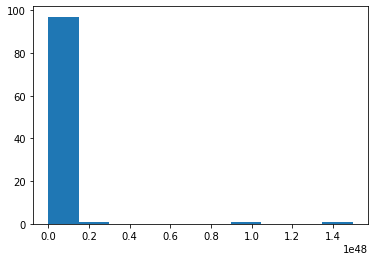

In [26]:
# Box-cox transform
from numpy.random import seed
from numpy.random import randn
from numpy import exp
from scipy.stats import boxcox

# Seed the random number generator
seed(1)

# Generate a univariate data sample
data = 5 * randn(100) + 100

# Transform to be exponential
data = exp(data)

# Histogram
plt.hist(data)
plt.show()

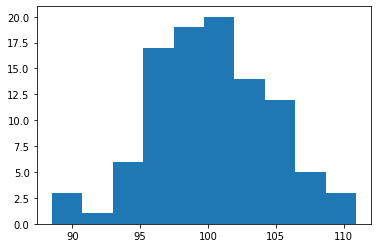

In [27]:
# Power transform
data = boxcox(data, 0)

# Histogram
plt.hist(data)
plt.show()

`A limitation of the Box-Cox transform is that it assumes that all values in the data sample are positive.` An alternative method that does not make this assumption is the **Yeo-Johnson transformation** See [yeojohnson()](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.yeojohnson.html) SciPy function.

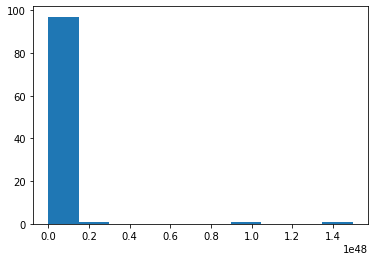

In [28]:
# Yeo-Johnson transformation
from numpy.random import seed
from numpy.random import randn
from numpy import exp
from scipy.stats import yeojohnson

# Seed the random number generator
seed(1)

# Generate a univariate data sample
data = 5 * randn(100) + 100

# Transform to be exponential
data = exp(data)

# Histogram
plt.hist(data)
plt.show()

3.656896094228096


/usr/local/lib/python3.8/dist-packages/scipy/optimize/optimize.py:2117: RuntimeWarning: invalid value encountered in double_scalars
  p = (x - v) * tmp2 - (x - w) * tmp1


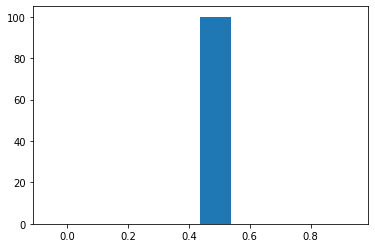

In [30]:
# Power transform
data, lmbda = yeojohnson(data, None)
print(lmbda) # lambda that maximizes the log-likelihood function

# Histogram
plt.hist(data)
plt.show()

### Final Remark
Finally, you may wish to treat the data as Gaussian anyway, especially if the data is already Gaussian-like. In some cases, such as the use of parametric statistical methods, this may lead to optimistic findings. In other cases, such as machine learning methods that make Gaussian expectations on input data, you may still see good results. `This is a choice you can make, as long as you are aware of the possible downsides`.